### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-04,426290,4256811,614811,559607,242547,130300,128136,159032,112233,91736,81844,121695,92194,4848,196673
2021-08-05,426754,4267790,615346,560706,243165,130390,128163,159803,112283,91761,81931,121899,92628,4848,196760
2021-08-06,427371,4278354,616493,561762,243733,130482,128187,160574,112347,91785,82006,122087,93086,4848,196818
2021-08-07,427862,4286932,616718,562752,244248,130585,128209,161343,112379,91789,82006,122277,93473,4848,196873
2021-08-08,428309,4294361,616829,563151,244420,130630,128220,162109,112407,91791,82006,122458,94015,4848,196950


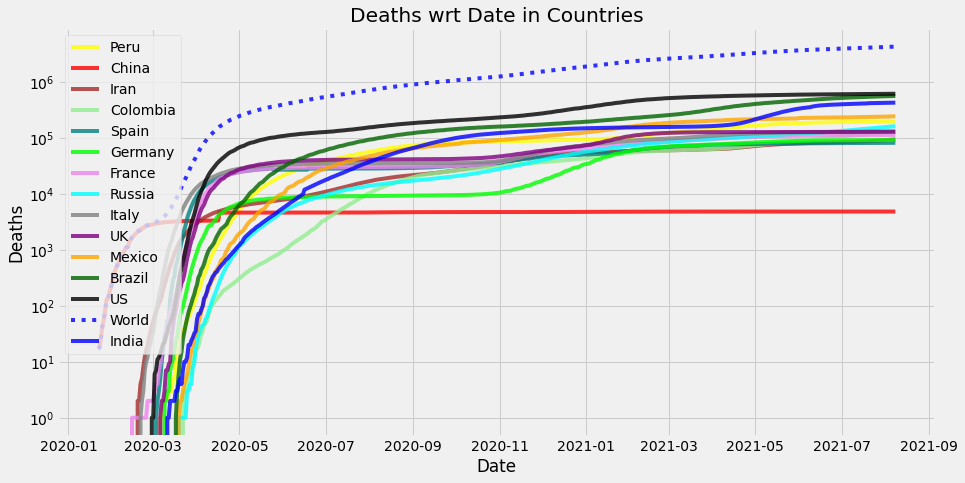

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-04,42982,671127,92714,40716,20685,29151,6590,22053,29241,3659,21874,7084,39357,87,2416
2021-08-05,44643,687940,109824,40054,21569,30009,7224,22564,26949,3457,21387,6540,38674,130,1993
2021-08-06,38628,821309,254981,42159,21563,31633,6599,22073,26006,3388,21561,6980,34913,109,1496
2021-08-07,39070,544732,44082,43033,20018,28344,6897,21727,25755,2761,0,6051,26439,103,1571
2021-08-08,35499,437309,24234,13893,7573,27244,5733,22271,20450,2240,0,4350,39619,127,1217


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-04,43808,544232,61281,40733,12341,29594,4038,22469,16024,1834,21265,13679,26168,58,1843
2021-08-05,43864,553813,64518,40687,12956,29621,4250,22475,16753,1942,21273,13203,27002,63,1853
2021-08-06,43515,571646,77215,40785,13530,29756,4407,22448,17369,2038,21292,12788,27529,66,1829
2021-08-07,43219,569851,75006,40935,13962,29661,4573,22400,17928,2086,19873,12339,27456,68,1812
2021-08-08,42704,561015,71621,39132,13536,29500,4650,22391,18097,2097,18548,11806,28267,72,1772


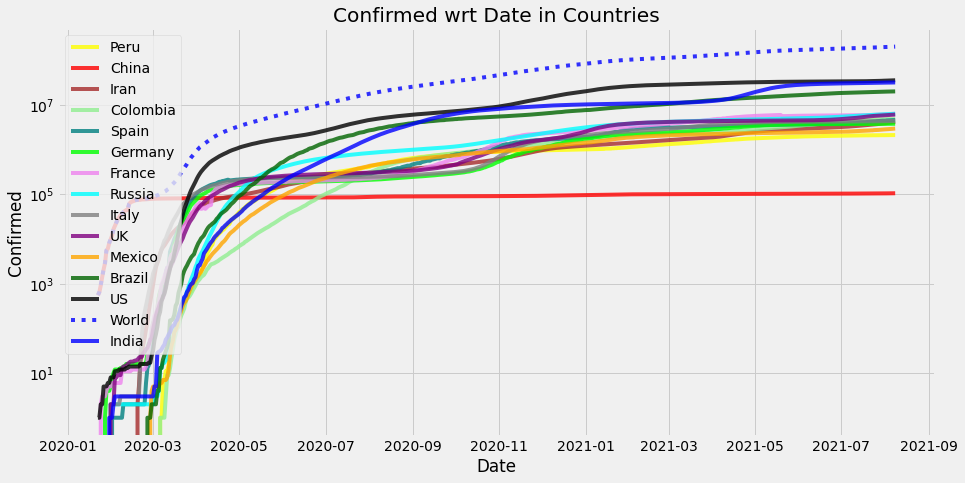

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-04,533,10583,490,1175,611,121,21,769,48,26,71,479,409,0,75
2021-08-05,464,10979,535,1099,618,90,27,771,50,25,87,204,434,0,87
2021-08-06,617,10564,1147,1056,568,92,24,771,64,24,75,188,458,0,58
2021-08-07,491,8578,225,990,515,103,22,769,32,4,0,190,387,0,55
2021-08-08,447,7429,111,399,172,45,11,766,28,2,0,181,542,0,77


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-04,608.50,9249.27,372.26,1007.34,387.26,79.43,17.33,765.76,38.26,19.42,54.98,315.22,315.05,-0.01,90.36
2021-08-05,590.44,9465.49,392.60,1018.80,416.11,80.75,18.54,766.41,39.73,20.11,58.98,301.31,329.92,-0.01,89.94
2021-08-06,593.76,9602.80,486.90,1023.45,435.09,82.16,19.22,766.99,42.76,20.60,60.99,287.15,345.93,-0.01,85.95
2021-08-07,580.92,9474.70,454.16,1019.27,445.08,84.76,19.57,767.24,41.42,18.52,53.36,275.01,351.06,-0.01,82.08
2021-08-08,564.18,9218.99,411.27,941.73,410.95,79.79,18.50,767.08,39.74,16.46,46.69,263.26,374.93,-0.00,81.44


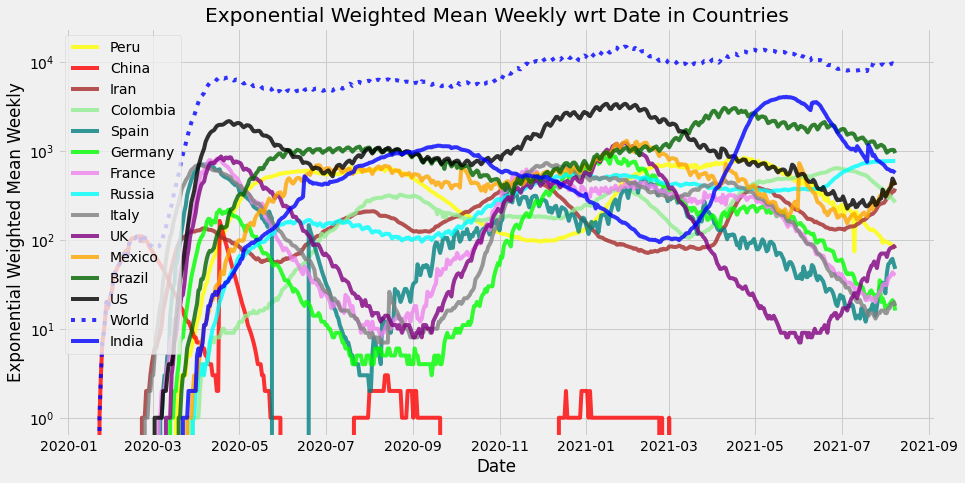

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

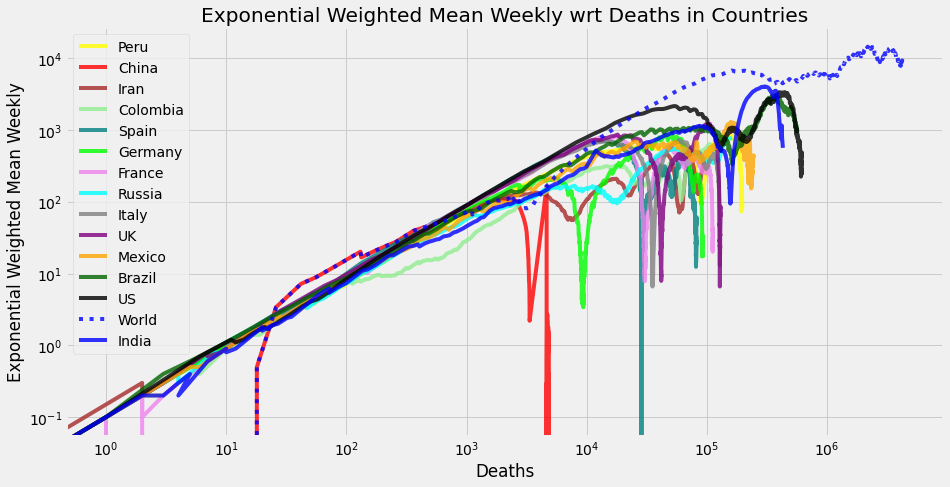

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

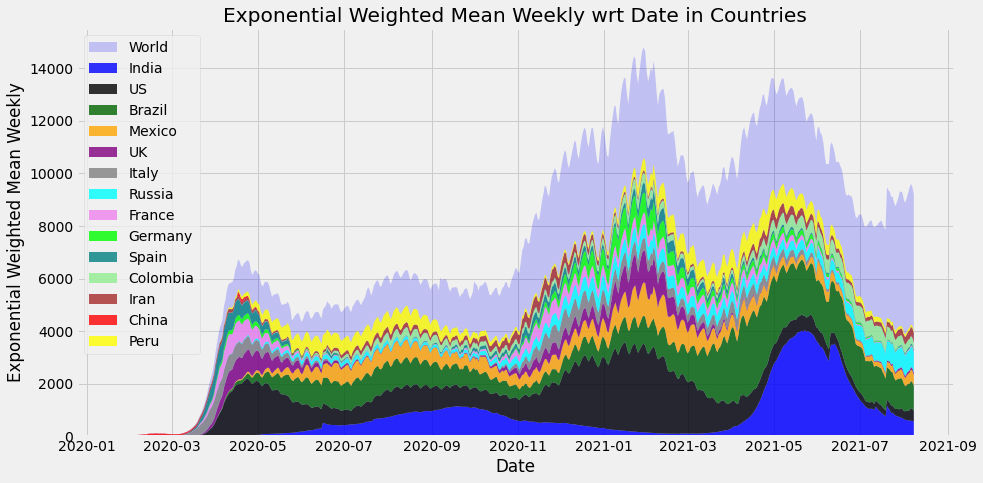

In [20]:
stackplotter(AVG, name)

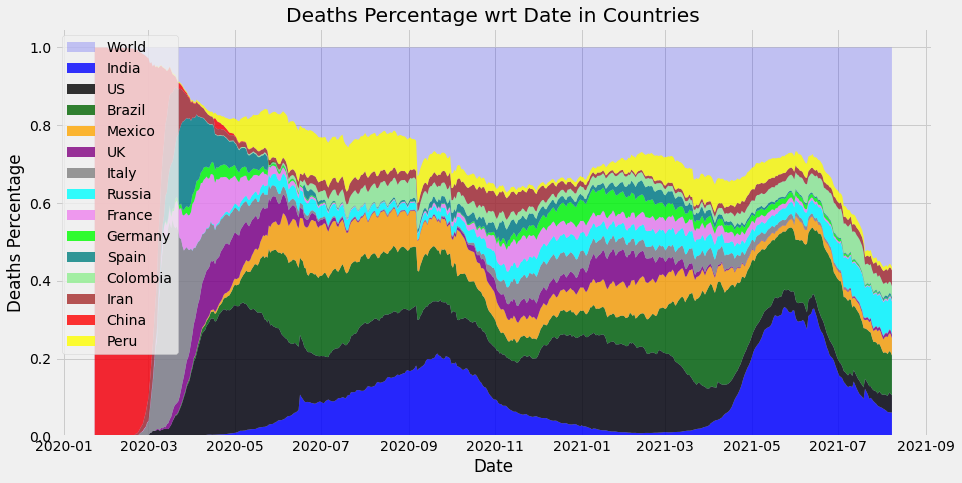

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

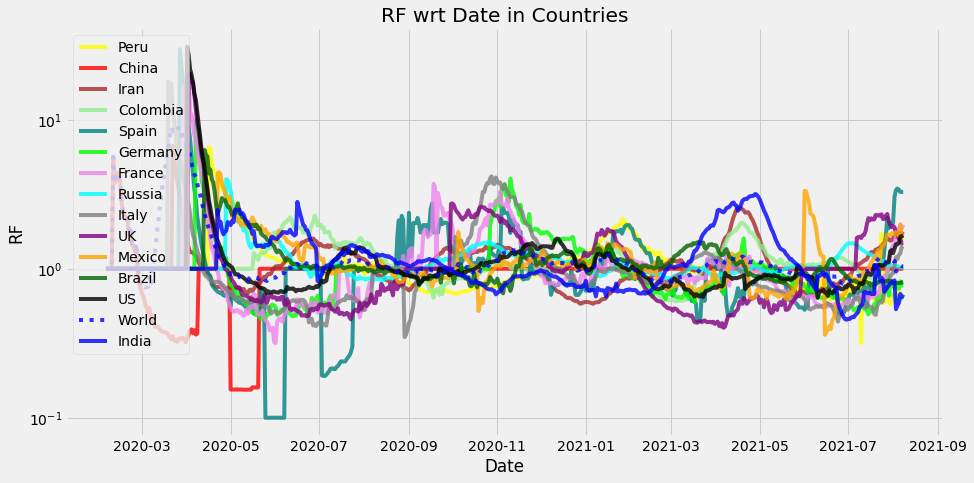

In [23]:
plotter(Reproductivity, 'RF')

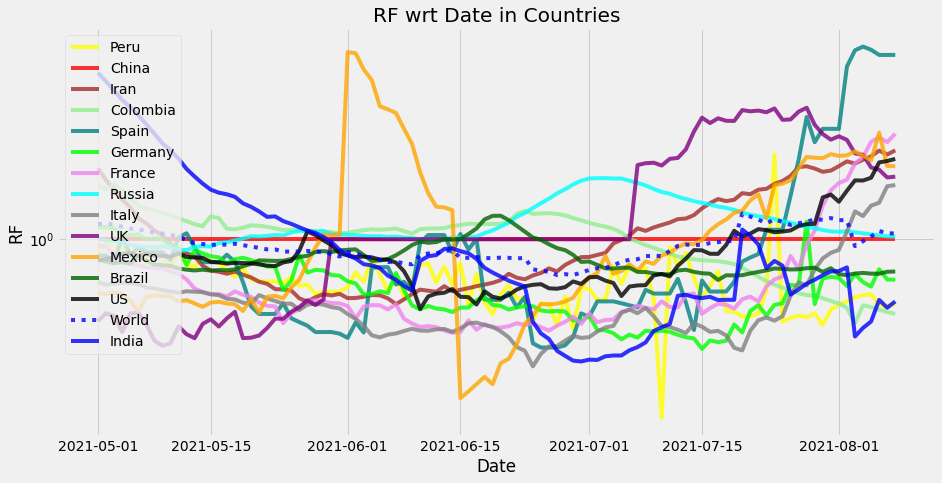

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

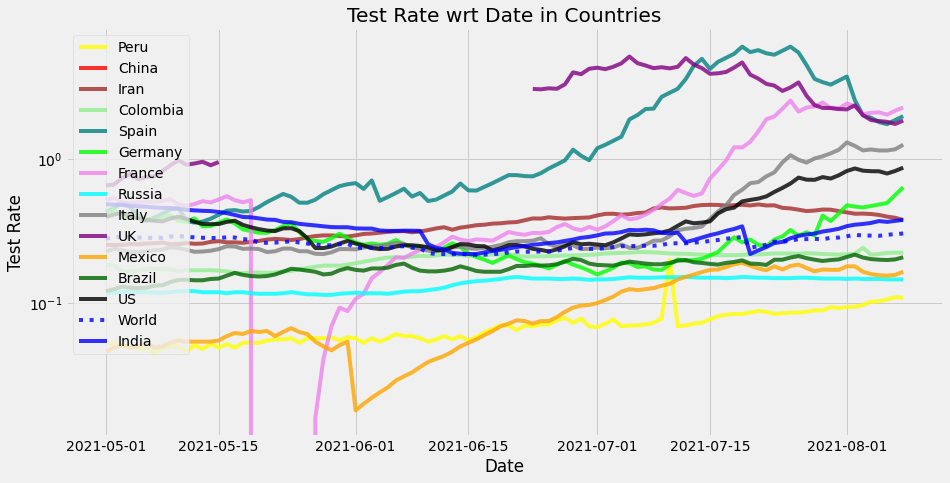

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

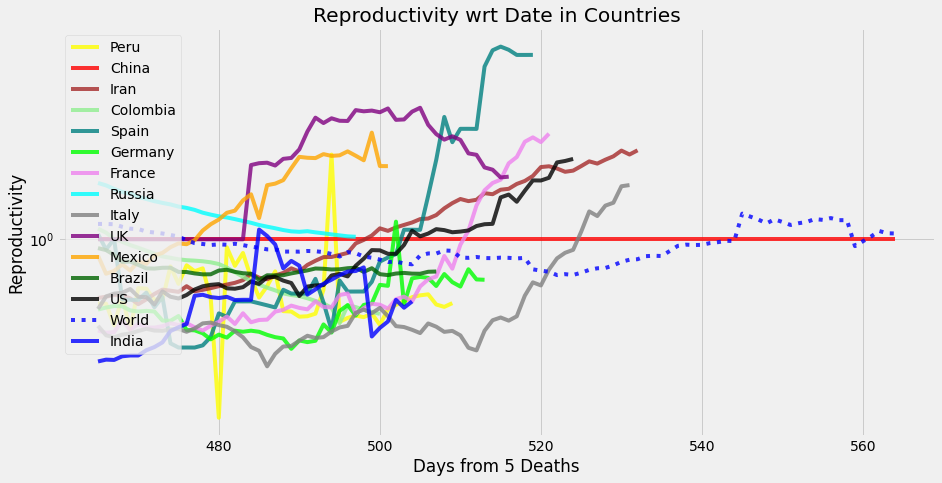

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

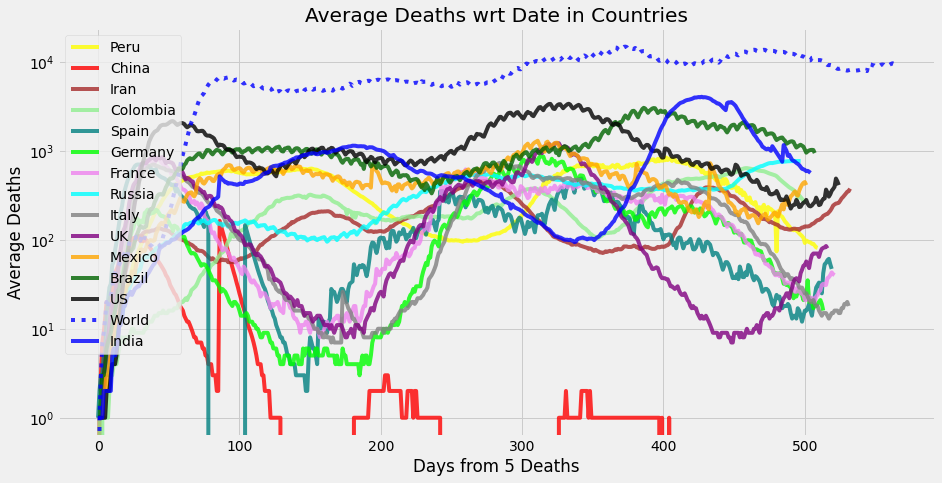

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

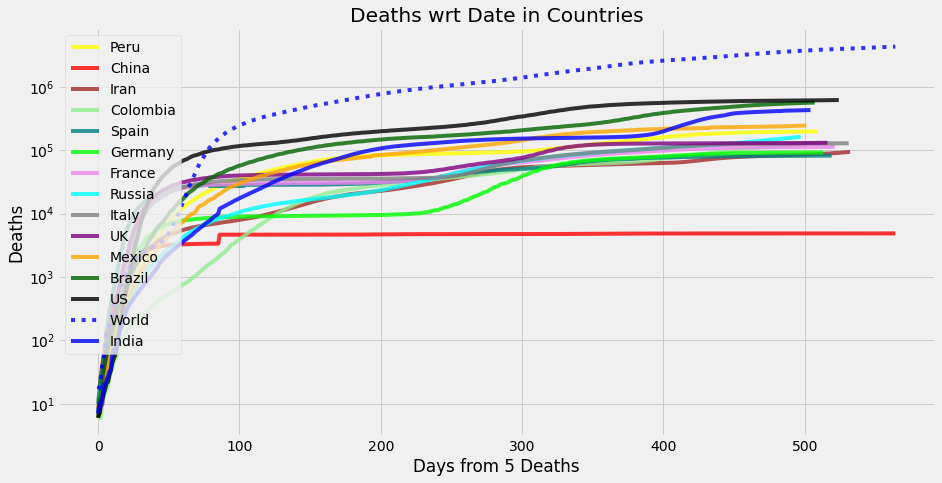

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4294361,7429,9517.14,9218.99,1.0381,202728255,0.304,561015,858.87
US,616829,111,505.29,411.27,1.6773,35763785,0.871,71621,123.37
Brazil,563151,399,902.43,941.73,0.8127,20165672,0.208,39132,112.63
India,428309,447,505.14,564.18,0.6704,31969954,0.378,42704,85.66
Mexico,244420,172,483.71,410.95,1.6013,2971817,0.165,13536,48.88
Peru,196950,77,73.14,81.44,0.6630,2125345,0.109,1772,39.39
Russia,162109,766,769.00,767.08,1.0163,6362641,0.146,22391,32.42
UK,130630,45,88.00,79.79,1.4964,6098117,1.849,29500,26.13
Italy,128220,11,21.71,18.50,1.4176,4396417,1.257,4650,25.64


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4294361,7429,9517.14,9218.99,1.0381,202728255,0.304,561015,858.87
Indonesia,107096,1498,1624.71,1588.22,1.3262,3666031,0.112,35619,21.42
Brazil,563151,399,902.43,941.73,0.8127,20165672,0.208,39132,112.63
Russia,162109,766,769.00,767.08,1.0163,6362641,0.146,22391,32.42
US,616829,111,505.29,411.27,1.6773,35763785,0.871,71621,123.37
India,428309,447,505.14,564.18,0.6704,31969954,0.378,42704,85.66
Mexico,244420,172,483.71,410.95,1.6013,2971817,0.165,13536,48.88
Iran,94015,542,431.29,374.93,1.7727,4158729,0.377,28267,18.80
South Africa,74813,190,374.57,355.49,0.9434,2533466,0.173,12297,14.96


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4294361


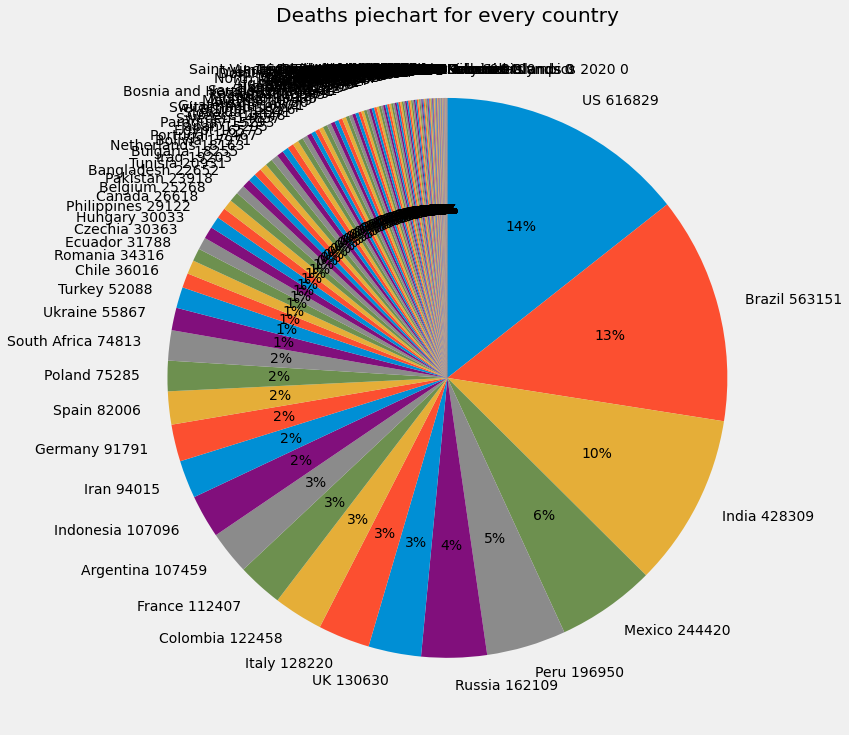

In [35]:
piechart('Deaths')

World total:  9517


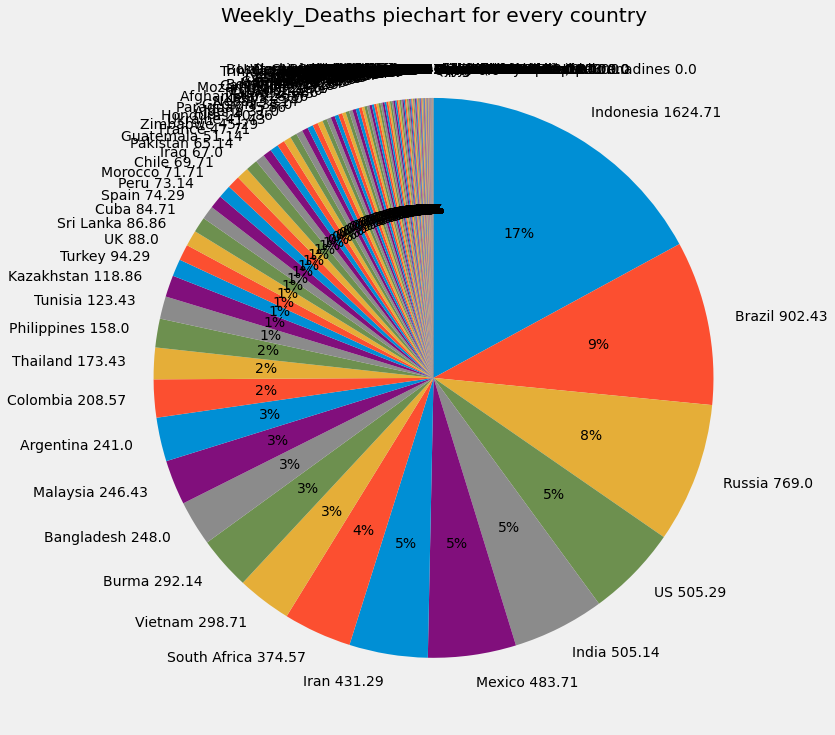

In [36]:
piechart('Weekly_Deaths')

World total:  7429


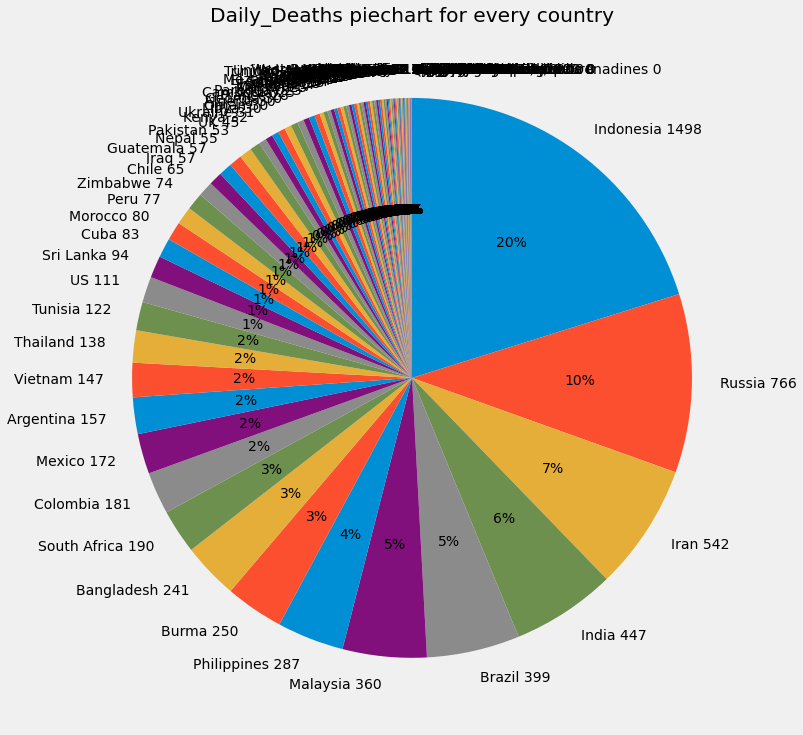

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-08-09


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

858872200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'AcE@DESKTOP-MIT841R.(none)')
Everything up-to-date
